In [232]:
#*#*#*#*#*#*#*#*#*#*#*#*
#*  Q1 & Q2 combined  *#
#*#*#*#*#*#*#*#*#*#*#*#*


# Function to calculate the '2'-norm of a vector
def norm(v):
    val = sum(np.power(v,2))**0.5
    return val


# The following function gives us the unique A=QR decompition
# Uniqueness has been achieved by keeping the diagonal entries
# of the matrix R positive. We use Householder reflections to
# find the orthogonal matrix Q and the upper triangular matrix
# R.

# QR decomposition using Houselholder reflections
def householder(m):
    Z = np.eye(m.shape[1])
    for i in range(0,m.shape[1]-1):
        x = np.zeros(m.shape[1]-i)
        x[0] = norm(m[i:,i])
        u = m[i:,i]-x
        v = u/norm(u)
        Q_temp = np.eye(m.shape[1]-i)-2*np.outer(v,v)
        Q = np.eye(m.shape[1])
        Q[i:,i:] = Q_temp
        Z = np.dot(Q,Z)
        m = np.dot(Q,m)
    
    D = np.diag(np.sign(np.diag(m))) 
    D_inv = D
    
    m = np.dot(D,m)               # Unique representation with positive diagonal entries
    Z = np.dot(Z.T,D_inv)
    
    return m, Z

In [233]:
# We start of the problem by generating some random integers. We have chose integers just 
# for their visual appeal and so that we do not have to deal with high decimal places in
# the orgiganl matrix, m, which we will decompose. We restrict ourselves to square, N x N,
# matrices. For now we also keep N relatively small (but the method works for all N)


import numpy as np
n = 7
m = np.random.randint(-5,5,[n,n])
m = np.dot(m.T,m)  # Gives a symmetric matrix

In [234]:
# Implementing Householder reflections using our function `househiolder' on the
# matrix `m'.

R, Q = householder(m)

print("The upper triangular matrix R is:")
print("\n")
print(np.around(R,decimals=1))

The upper triangular matrix R is:


[[113.9  38.2  88.  -72.5   1.1 -19.2 -16.6]
 [ -0.   44.8  28.9 -59.  -49.7  18.4  12.7]
 [  0.   -0.   65.  -14.5  30.8  59.9 -71. ]
 [  0.    0.    0.   13.5 -31.2 -32.3  16.5]
 [ -0.    0.   -0.   -0.   28.6  26.8 -29.7]
 [ -0.    0.   -0.   -0.    0.    8.1 -16.8]
 [ -0.   -0.    0.    0.   -0.   -0.    0.7]]


In [235]:
# We can see that our decomposition works fine since the we get A=QR.

print("QR=\n",np.round(np.dot(Q,R),5),"\n \n","m=\n",m)


QR=
 [[ 89.  19.  47. -40.  10. -27.  -7.]
 [ 19.  30.  20. -37. -20.   4.   4.]
 [ 47.  20.  84. -42.  -0.  15. -34.]
 [-40. -37. -42.  63.  16. -13.   1.]
 [ 10. -20.   0.  16.  57.  19. -29.]
 [-27.   4.  15. -13.  19.  57. -37.]
 [ -7.   4. -34.   1. -29. -37.  59.]] 
 
 m=
 [[ 89  19  47 -40  10 -27  -7]
 [ 19  30  20 -37 -20   4   4]
 [ 47  20  84 -42   0  15 -34]
 [-40 -37 -42  63  16 -13   1]
 [ 10 -20   0  16  57  19 -29]
 [-27   4  15 -13  19  57 -37]
 [ -7   4 -34   1 -29 -37  59]]


In [236]:
#*#*#*#*#*#*#*#*#*#*#*#*
#*        Q3          *#
#*#*#*#*#*#*#*#*#*#*#*#*


# This function modifies the Householder reflections to produce
# a Hessenberg matrix

def hessenberg(m):
    Z = np.eye(m.shape[1])
    for i in range(0,m.shape[1]-2):
        x = np.zeros(m.shape[1]-i-1)
        x[0] = norm(m[(i+1):,(i)])
        u = m[(i+1):,(i)]-x
        v = u/norm(u)
        Q_temp = np.eye(m.shape[1]-i-1)-2*np.outer(v,v)
        Q = np.eye(m.shape[1])
        Q[(i+1):,(i+1):] = Q_temp
        Z = np.dot(Q,Z)
        m = np.dot(Q,m)
    
    D = np.diag(np.sign(np.diag(m))) 
    D_inv = np.linalg.inv(D)
    
    m = np.dot(D,m)               # Unique representation with positive diagonal entries
    Z = np.dot(Z.T,D_inv)
    
    return m, Z

# If A is a realy symmetric matrix we can use Householder reflections
# to decompose A to a tridiagonal matrix T, which is given by
# A = Q*T*Q^t. where Q is an orthogonal matrix and simultaneously 
# Q^t*A*Q = T

def tridiagonal(m):
    # Here m must be a symmetric
    
    Z = np.eye(m.shape[1])
    for i in range(0,m.shape[1]-2):
        x = np.zeros(m.shape[1]-i-1)
        x[0] = norm(m[(i+1):,(i)])
        u = m[(i+1):,(i)]-x
        v = u/norm(u)
        Q_temp = np.eye(m.shape[1]-i-1)-2*np.outer(v,v)
        Q = np.eye(m.shape[1])
        Q[(i+1):,(i+1):] = Q_temp
        Z = np.dot(Q,Z)
        m = np.dot(np.dot(Q,m),Q)
    
    # We enforce EXACT symmetry
    for i in range(0,m.shape[1]-1):
        for j in range(i+1,m.shape[1]-1):
            m[i,j] = m[j,i]
    
    return m, Z
    
    
    
    

In [237]:
# Computing the Hessenberg form
R, Q = hessenberg(m)
print("Hessenberg reduction:\n")
print(np.round(R,4))


Hessenberg reduction:

[[ 89.      19.      47.     -40.      10.     -27.      -7.    ]
 [ 71.0493  37.3544  82.2105 -66.0527 -10.6968   2.9698 -17.8186]
 [ -0.      41.2995  16.6365 -52.8249 -47.7591  11.8661  17.8356]
 [ -0.       0.     -59.7131  13.9659 -31.3655 -59.5756  70.5179]
 [  0.       0.      -0.     -13.3986  30.404   31.0468 -14.8782]
 [ -0.      -0.       0.       0.      28.3452  25.998  -28.4211]
 [ -0.      -0.       0.      -0.      -0.      -7.0942  15.0496]]


In [238]:
T, Q = tridiagonal(m)
print("The tridiagonal matrix is:")
print(np.round(T,5))

print("\n"+"\n"+"The orthogonal matrix Q:")
print(np.round(Q,1))

The tridiagonal matrix is:
[[ 89.       71.04928  -0.        0.        0.        0.       -0.     ]
 [ 71.04928 100.68106  53.11266   0.        0.       -0.       -0.     ]
 [ -0.       53.11266  79.17893  24.50416  -0.       -0.       -0.     ]
 [  0.        0.       24.50416  85.87987  44.00944  -0.       -0.     ]
 [  0.        0.       -0.       44.00944  55.19041  14.4062   -0.     ]
 [  0.       -0.       -0.       -0.       14.4062   23.722     4.46095]
 [ -0.       -0.        0.       -0.        0.        4.46095   5.34773]]


The orthogonal matrix Q:
[[ 1.   0.   0.   0.   0.   0.   0. ]
 [ 0.   0.3  0.7 -0.6  0.1 -0.4 -0.1]
 [ 0.   0.2  0.3 -0.2 -0.5  0.8 -0.1]
 [ 0.   0.  -0.2 -0.2  0.6  0.3 -0.7]
 [ 0.  -0.4  0.6  0.5  0.3  0.2  0. ]
 [ 0.  -0.2  0.1  0.2 -0.5 -0.4 -0.7]
 [ 0.   0.8  0.   0.5  0.1 -0.1 -0.1]]


In [239]:
print("Easy to check that Q^t*T*Q=m \n")

print("Q^t*T*Q")
print(np.round(np.dot(Q.T,np.dot(T,Q)),4))
print("\n"+"\n")
print("m")
print(m)

Easy to check that Q^t*T*Q=m 

Q^t*T*Q
[[ 89.  19.  47. -40.  10. -27.  -7.]
 [ 19.  30.  20. -37. -20.   4.   4.]
 [ 47.  20.  84. -42.  -0.  15. -34.]
 [-40. -37. -42.  63.  16. -13.   1.]
 [ 10. -20.  -0.  16.  57.  19. -29.]
 [-27.   4.  15. -13.  19.  57. -37.]
 [ -7.   4. -34.   1. -29. -37.  59.]]



m
[[ 89  19  47 -40  10 -27  -7]
 [ 19  30  20 -37 -20   4   4]
 [ 47  20  84 -42   0  15 -34]
 [-40 -37 -42  63  16 -13   1]
 [ 10 -20   0  16  57  19 -29]
 [-27   4  15 -13  19  57 -37]
 [ -7   4 -34   1 -29 -37  59]]


In [240]:
print("Easy to check that Q^t*Q=I")
print(np.round(np.dot(Q,Q.T),4))

print("\n"+"\n")

print("And that Q*Q^t=I")
print(np.round(np.dot(Q.T,Q),4))

Easy to check that Q^t*Q=I
[[ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -0. -0.  0.  0. -0.]
 [ 0. -0.  1.  0. -0.  0. -0.]
 [ 0. -0.  0.  1. -0.  0. -0.]
 [ 0.  0. -0. -0.  1. -0. -0.]
 [ 0.  0.  0.  0. -0.  1.  0.]
 [ 0. -0. -0. -0. -0.  0.  1.]]



And that Q*Q^t=I
[[ 1.  0.  0.  0.  0.  0.  0.]
 [ 0.  1. -0. -0. -0. -0.  0.]
 [ 0. -0.  1. -0. -0. -0.  0.]
 [ 0. -0. -0.  1. -0. -0.  0.]
 [ 0. -0. -0. -0.  1. -0.  0.]
 [ 0. -0. -0. -0. -0.  1.  0.]
 [ 0.  0.  0.  0.  0.  0.  1.]]


In [241]:
#*#*#*#*#*#*#*#*#*#*#*#*
#*        Q4          *#
#*#*#*#*#*#*#*#*#*#*#*#*


# In this part we implement the PURE QR iteration
# this take a matrix A and produces an upper triangular matrix
# that contains the eigenvalues of A. Under the additional 
# assumption that A is symmetric we get the the iteration 
# converges to a diagonal containing the eigenvalues of A.

def QR_pure(m, nmax):
    T, Q = tridiagonal(m)       # using the tridiagonal form of m
    A = T
    estimated_eigen = np.sort(np.diag(A))
    
    for i in range(0,nmax):
        R, Q = householder(A)
        A = np.dot(R,Q)
        estimated_eigen = np.vstack([estimated_eigen,np.sort(np.diag(A))])
        test = A[m.shape[1]-1,m.shape[1]-1]
    return A, estimated_eigen


def QR_shift(m, nmax):
    T, Q = tridiagonal(m)                                     # using the tridiagonal form of m
    A = T
    estimated_eigen = np.sort(np.diag(A))                     # Stores the intermediate eigenvalues
    mu = A[m.shape[1]-1,m.shape[1]-1]                         # mu based on Rayleigh Coefficient 
    
    for i in range(0,nmax):
        R, Q = householder(A-mu*np.eye(m.shape[1]))           # QR using Householder
        A = np.dot(R,Q)+mu*np.eye(m.shape[1])
        mu = A[m.shape[1]-1,m.shape[1]-1]
        estimated_eigen = np.vstack([estimated_eigen,np.sort(np.diag(A))])
    return A, estimated_eigen

def QR_wilkinson(m, nmax):
    T, Q = tridiagonal(m)                                     # using the tridiagonal form of m
    A = T
    estimated_eigen = np.sort(np.diag(A))                     # Stores the intermediate eigenvalues
    B = A[(A.shape[1]-2):,(A.shape[1]-2):]
    delta = (B[0,0]-B[1,1])/2
    mu = B[1,1]-np.sign(delta)*(B[0,1]**2)/(np.abs(delta)+(delta**2+B[0,1]**2)**0.5)
                                                              # mu based on Wilkinson
    for i in range(0,nmax):
        R, Q = householder(A-mu*np.eye(m.shape[1]))           # QR using Householder
        A = np.dot(R,Q)+mu*np.eye(m.shape[1])
        B = A[(A.shape[1]-2):,(A.shape[1]-2):]
        delta = (B[0,0]-B[1,1])/2
        mu = B[1,1]-np.sign(delta)*(B[0,1]**2)/(np.abs(delta)+(delta**2+B[0,1]**2)**0.5)
        estimated_eigen = np.vstack([estimated_eigen,np.sort(np.diag(A))])
        
    return A, estimated_eigen




In [242]:
#*#*#*#*#*#*#*#*#*#*#*#*
#*     Q5 & Q6        *#
#*#*#*#*#*#*#*#*#*#*#*#*
np.random.seed(12345)
n = 10
m = np.random.uniform(-10,10,[n,n])
R, Q = householder(m)

#Lambda = np.diag(np.random.randint(-2,2,[n]))       # Repeated Eigenvalue
#Lambda = np.diag(np.random.uniform(-0.001,0.001,[n]))       # Extremely Small Eigenvalue
Lambda = np.diag(np.random.uniform(900,1000,[n]))       # Extremely Large Eigenvalue
m = np.dot(np.dot(Q.T, Lambda),Q)
# print(np.round(m,2))


In [243]:

# Running a PURE QR:
nmax = 250
A, eA = QR_pure(m, nmax)
B, eB = QR_shift(m, nmax)
C, eC = QR_wilkinson(m, nmax)


print("True eigenvalues are:")
print(np.sort(np.round(np.diag(Lambda),3)))

print("\n"+"\n")
print("The eigenvalues for m from PURE QR are:")
print(np.sort(np.round(np.diag(A),3)))



print("\n"+"\n")
print("The eigenvalues for m from SHIFT QR are:")
print(np.sort(np.round(np.diag(B),3)))



print("\n"+"\n")
print("The eigenvalues for m from WILKINSON QR are:")
print(np.sort(np.round(np.diag(C),3)))





True eigenvalues are:
[908.622 914.295 919.579 929.45  951.583 958.162 962.7   964.736 968.934
 985.663]



The eigenvalues for m from PURE QR are:
[912.608 913.238 926.258 936.212 942.739 955.075 960.216 965.69  966.027
 985.662]



The eigenvalues for m from SHIFT QR are:
[908.622 914.295 919.579 929.45  951.583 958.162 962.7   964.736 968.934
 985.663]



The eigenvalues for m from WILKINSON QR are:
[908.622 914.295 919.579 929.45  951.583 958.162 962.7   964.736 968.934
 985.663]


In [244]:
true_eval = np.sort(np.diag(Lambda))

errA_min = np.log(np.abs(eA[:,0]-true_eval[0]))
errA_mid = np.log(np.abs(eA[:,np.int(m.shape[1]/2)]-true_eval[np.int(m.shape[1]/2)]))
errA_max = np.log(np.abs(eA[:,m.shape[1]-1]-true_eval[m.shape[1]-1]))

errB_min = np.log(np.abs(eB[:,0]-true_eval[0]))
errB_mid = np.log(np.abs(eB[:,np.int(m.shape[1]/2)]-true_eval[np.int(m.shape[1]/2)]))
errB_max = np.log(np.abs(eB[:,m.shape[1]-1]-true_eval[m.shape[1]-1]))

errC_min = np.log(np.abs(eC[:,0]-true_eval[0]))
errC_mid = np.log(np.abs(eC[:,np.int(m.shape[1]/2)]-true_eval[np.int(m.shape[1]/2)]))
errC_max = np.log(np.abs(eC[:,m.shape[1]-1]-true_eval[m.shape[1]-1]))

<ipython-input-244-f13d157954dc>:7: RuntimeWarning: divide by zero encountered in log
  errB_min = np.log(np.abs(eB[:,0]-true_eval[0]))
<ipython-input-244-f13d157954dc>:11: RuntimeWarning: divide by zero encountered in log
  errC_min = np.log(np.abs(eC[:,0]-true_eval[0]))
<ipython-input-244-f13d157954dc>:12: RuntimeWarning: divide by zero encountered in log
  errC_mid = np.log(np.abs(eC[:,np.int(m.shape[1]/2)]-true_eval[np.int(m.shape[1]/2)]))


Text(0.5, 1.0, 'Error using PURE QR')

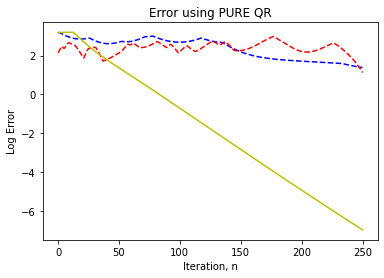

In [245]:
import matplotlib.pyplot as plt

# Plotting the error

plt.plot(errA_min, 'b--',errA_mid, 'r--',errA_max, 'y-')
plt.xlabel('Iteration, n')
plt.ylabel('Log Error')
plt.title('Error using PURE QR')

# In Blue is the path taken by the estimate of the smallest eigenvalue
# In Red is the path taken by the estimate of the middle eigenvalue
# In Yellow is the path taken by the estimate of the largest eigenvalue


Text(0.5, 1.0, 'Error using SHIFT QR')

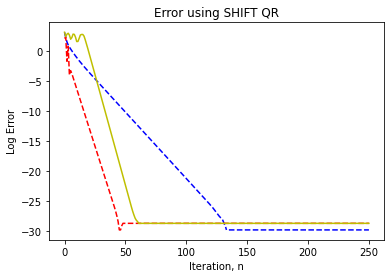

In [246]:
plt.plot(errB_min, 'b--',errB_mid, 'r--',errB_max, 'y-')
plt.xlabel('Iteration, n')
plt.ylabel('Log Error')
plt.title('Error using SHIFT QR')

# In Blue is the path taken by the estimate of the smallest eigenvalue
# In Red is the path taken by the estimate of the middle eigenvalue
# In Yellow is the path taken by the estimate of the largest eigenvalue


Text(0.5, 1.0, 'Error using WILKINSON QR')

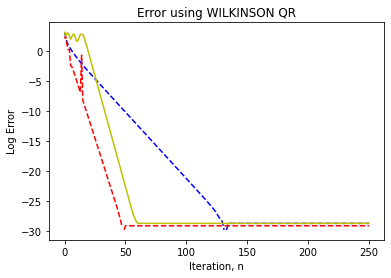

In [247]:
plt.plot(errC_min, 'b--',errC_mid, 'r--',errC_max, 'y-')
plt.xlabel('Iteration, n')
plt.ylabel('Log Error')
plt.title('Error using WILKINSON QR')

# In Blue is the path taken by the estimate of the smallest eigenvalue
# In Red is the path taken by the estimate of the middle eigenvalue
# In Yellow is the path taken by the estimate of the largest eigenvalue


In [248]:
#*#*#*#*#*#*#*#*#*#*#*#*
#*         Q7         *#
#*#*#*#*#*#*#*#*#*#*#*#*

# In this section we modify the QR algorithm so that we are reducing the matrix
# everytime the last subdiagonal element shrinks to near our Tolerance factor


def QR_pure(m, nmax, TOL):
    T, Q = tridiagonal(m)       # using the tridiagonal form of m
    A = T
    it = 1
    estimated_eigen = np.sort(np.diag(A))
    
    while np.abs(A[m.shape[1]-1,m.shape[1]-2]) > TOL:
        R, Q = householder(A)
        A = np.dot(R,Q)
        estimated_eigen = np.vstack([estimated_eigen,np.sort(np.diag(A))])
        test = A[m.shape[1]-1,m.shape[1]-1]
        it = it+1
        if it > nmax:
            break
    return A, estimated_eigen, it


def QR_shift(m, nmax, TOL):
    T, Q = tridiagonal(m)                                     # using the tridiagonal form of m
    A = T
    it = 1                                                    # Counts the number of iterations
    estimated_eigen = np.sort(np.diag(A))                     # Stores the intermediate eigenvalues
    mu = A[m.shape[1]-1,m.shape[1]-1]                         # mu based on Rayleigh Coefficient 
    
    while np.abs(A[m.shape[1]-1,m.shape[1]-2]) > TOL:
        R, Q = householder(A-mu*np.eye(m.shape[1]))           # QR using Householder
        A = np.dot(R,Q)+mu*np.eye(m.shape[1])
        mu = A[m.shape[1]-1,m.shape[1]-1]
        estimated_eigen = np.vstack([estimated_eigen,np.sort(np.diag(A))])
        
        it = it+1
        if it > nmax:
            break
    return A, estimated_eigen, it

def QR_wilkinson(m, nmax, TOL):
    T, Q = tridiagonal(m)                                     # using the tridiagonal form of m
    A = T
    it = 1                                                    # Counts the number of iterations
    estimated_eigen = np.sort(np.diag(A))                     # Stores the intermediate eigenvalues
    B = A[(A.shape[1]-2):,(A.shape[1]-2):]
    delta = (B[0,0]-B[1,1])/2
    mu = B[1,1]-np.sign(delta)*(B[0,1]**2)/(np.abs(delta)+(delta**2+B[0,1]**2)**0.5)
                                                              # mu based on Wilkinson
    while np.abs(A[m.shape[1]-1,m.shape[1]-2]) > TOL:
        R, Q = householder(A-mu*np.eye(m.shape[1]))           # QR using Householder
        A = np.dot(R,Q)+mu*np.eye(m.shape[1])
        B = A[(A.shape[1]-2):,(A.shape[1]-2):]
        delta = (B[0,0]-B[1,1])/2
        mu = B[1,1]-np.sign(delta)*(B[0,1]**2)/(np.abs(delta)+(delta**2+B[0,1]**2)**0.5)
        estimated_eigen = np.vstack([estimated_eigen,np.sort(np.diag(A))])
        
        it = it+1
        if it > nmax:
            break
    return A, estimated_eigen, it



#*#*#*#*#*#*#*#*#*#*#*#*
#*    Deflationary    *#
#*#*#*#*#*#*#*#*#*#*#*#*

def modified_QR_pure(m):
    i = 0
    A = m
    n = m.shape[1]-1
    evals = np.zeros(m.shape[1])
    iTeR = 1
    
    if m.shape[1] > 2:
        A, eA, itA = QR_pure(m, 1000, 1e-10)
        evals[n] = A[n,n]
        while n>=2:
            n = n-1
            A, eA, itA = QR_pure(A[:n+1,:n+1], 1000, 1e-10)
            evals[n] = A[n,n]
            iTeR = iTeR+itA
            
        evals[0:2] = np.diag(A)
    else:
        A, eA, itA = QR_pure(m, 1000, 1e-10)
        evals[0:2] = np.diag(A)
    
    return evals, iTeR





def modified_QR_shift(m):
    i = 0
    A = m
    n = m.shape[1]-1
    evals = np.zeros(m.shape[1])
    iTeR = 1
    
    if m.shape[1] > 2:
        A, eA, itA = QR_pure(m, 1000, 1e-10)
        evals[n] = A[n,n]
        while n>=2:

            n = n-1
            A, eA, itA = QR_shift(A[:n+1,:n+1], 1000, 1e-10)
            evals[n] = A[n,n]
            iTeR = iTeR+itA
            
        evals[0:2] = np.diag(A)
    else:
        A, eA, itA = QR_pure(m, 1000, 1e-10)
        evals[0:2] = np.diag(A)
    
    return evals, iTeR




def modified_QR_wilkinson(m):
    i = 0
    A = m
    n = m.shape[1]-1
    evals = np.zeros(m.shape[1])
    iTeR = 1
    if m.shape[1] > 2:
        A, eA, itA = QR_pure(m, 1000, 1e-10)
        evals[n] = A[n,n]
        while n>=2:

            n = n-1; 
            A, eA, itA = QR_wilkinson(A[:n+1,:n+1], 1000, 1e-10)
            evals[n] = A[n,n]
            iTeR = iTeR+itA
            
        evals[0:2] = np.diag(A)
    else:
        A, eA, itA = QR_pure(m, 1000, 1e-10)
        evals[0:2] = np.diag(A)
    
    return evals, iTeR



# Generate a random matrix
np.random.seed(54321)
n = 10
m = np.random.uniform(-10,10,[n,n])
R, Q = householder(m)

#Lambda = np.diag(np.random.randint(-2,2,[n]))       # Repeated Eigenvalue
#Lambda = np.diag(np.random.uniform(-0.001,0.001,[n]))       # Extremely Small Eigenvalue
Lambda = np.diag(np.random.uniform(900,1000,[n]))       # Extremely Large Eigenvalue
m = np.dot(np.dot(Q.T, Lambda),Q)

# print(np.round(m,2))


In [249]:
eA, itA = modified_QR_pure(m)
eB, itB = modified_QR_shift(m)
eC, itC = modified_QR_wilkinson(m)

In [250]:
print("True eigenvalues are:")
print(np.sort(np.round(np.diag(Lambda),3)))

print("\n"+"\n")
print("The eigenvalues for m from PURE QR are:")
print(np.sort(np.round(eA,3)))
print("Iterations needed:")
print(itA)

print("\n"+"\n")
print("The eigenvalues for m from SHIFT QR are:")
print(np.sort(np.round(eB,3)))
print("Iterations needed:")
print(itB)

print("\n"+"\n")
print("The eigenvalues for m from WILKINSON QR are:")
print(np.sort(np.round(eC,3)))
print("Iterations needed:")
print(itC)

True eigenvalues are:
[901.605 928.716 930.678 940.958 951.9   957.21  962.711 968.461 975.818
 992.812]



The eigenvalues for m from PURE QR are:
[901.605 928.716 930.677 940.958 951.901 957.21  962.711 968.461 975.818
 992.812]
Iterations needed:
8009



The eigenvalues for m from SHIFT QR are:
[901.605 928.716 930.678 940.958 951.9   957.21  962.711 968.461 975.818
 992.812]
Iterations needed:
1186



The eigenvalues for m from WILKINSON QR are:
[901.605 928.716 930.678 940.958 951.9   957.21  962.711 968.461 975.818
 992.812]
Iterations needed:
201


In [251]:
# We comment on the results:


# We can see that from the PURE QR algorithm the number of iterations needed is very large.
# Even by deflating the matrix after every eigne value has been calculated there is a significantly
# higher number of iterations. On the other hand for the methods with shifts we actually see 
# that there is much faster convergence. Both Rayleigh-Shift and Wilkinson shift are able to locate
# the eigenvalues fairly quickly.



Text(0.5, 1.0, 'Error using Cropped-QR Algorithms')

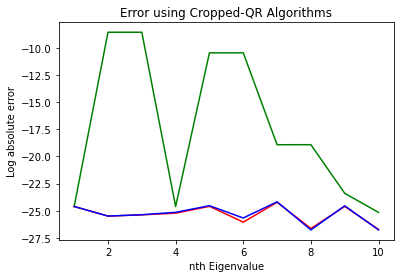

In [252]:
t = range(1,(n+1))
plt.plot(t, np.log(np.abs(np.sort(eA)-np.sort(np.diag(Lambda)))),'g',
         t, np.log(np.abs(np.sort(eB)-np.sort(np.diag(Lambda)))),'r',
         t, np.log(np.abs(np.sort(eC)-np.sort(np.diag(Lambda)))),'b' )
plt.xlabel('nth Eigenvalue')
plt.ylabel('Log absolute error')
plt.title('Error using Cropped-QR Algorithms')

# Green shows the pure QR
# Red shows the shift QR
# Blue shows the Wilkinson QR

